# Project 3 - Customer Service Requests Analysis

<b>DESCRIPTION

<b>Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

<b>Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

<b>Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the following:
    
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?
    
<b>Dataset Description :

Unique Key (Plain text) - Unique identifier for the complaints

Created Date (Date and Time) - The date and time on which the complaint is raised

Closed Date (Date and Time) - The date and time on which the complaint is closed

Agency (Plain text) - Agency code

Agency Name (Plain text) - Name of the agency

Complaint Type (Plain text) - Type of the complaint

Descriptor (Plain text) - Complaint type label (Heating - Heat, Traffic Signal Condition - Controller)

Location Type (Plain text) - Type of the location (Residential, Restaurant, Bakery, etc)

Incident Zip (Plain text) - Zip code for the location

Incident Address (Plain text) - Address of the location

Street Name (Plain text) - Name of the street

Cross Street 1 (Plain text) - Detail of cross street

Cross Street 2 (Plain text) - Detail of another cross street

Intersection Street 1 (Plain text) - Detail of intersection street if any

Intersection Street 2 (Plain text) - Detail of another intersection street if any

Address Type (Plain text) - Categorical (Address or Intersection)

City (Plain text) - City for the location

Landmark (Plain text) - Empty field

Facility Type (Plain text) - N/A

Status (Plain text) - Categorical (Closed or Pending)

Due Date (Date and Time) - Date and time for the pending complaints

Resolution Action Updated Date (Date and Time) - Date and time when the resolution was provided

Community Board (Plain text) - Categorical field (specifies the community board with its code)

Borough (Plain text) - Categorical field (specifies the community board)

X Coordinate (State Plane) (Number)

Y Coordinate (State Plane) (Number)

Park Facility Name (Plain text) - Unspecified

Park Borough (Plain text) - Categorical (Unspecified, Queens, Brooklyn etc)

School Name (Plain text) - Unspecified

School Number (Plain text) - Unspecified

School Region (Plain text) - Unspecified

School Code (Plain text) - Unspecified

School Phone Number (Plain text) - Unspecified

School Address (Plain text) - Unspecified

School City (Plain text) - Unspecified

School State (Plain text) - Unspecified

School Zip (Plain text) - Unspecified

School Not Found (Plain text) - Empty Field

School or Citywide Complaint (Plain text) - Empty Field

Vehicle Type (Plain text) - Empty Field

Taxi Company Borough (Plain text) - Empty Field

Taxi Pick Up Location (Plain text) - Empty Field

Bridge Highway Name (Plain text) - Empty Field

Bridge Highway Direction (Plain text) - Empty Field

Road Ramp (Plain text) - Empty Field

Bridge Highway Segment (Plain text) - Empty Field

Garage Lot Name (Plain text) - Empty Field

Ferry Direction (Plain text) - Empty Field

Ferry Terminal Name (Plain text) - Empty Field

Latitude (Number) - Latitude of the location

Longitude (Number) - Longitude of the location

Location (Location) - Coordinates (Latitude, Longitude)
    

In [21]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# 1. Import a 311 NYC service request.

In [3]:
#Load dataset from file "311_Service_Requests_from_2010_to_Present.csv"
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\indir\AppData\Local\Temp\ipykernel_8788\4065109521.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
dataset.shape

(300698, 53)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
#Identify variables with null values
dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

# 2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [9]:
dataset['Created Date'] = pd.to_datetime(dataset['Created Date'])
dataset['Closed Date'] = pd.to_datetime(dataset['Closed Date'])

In [11]:
dataset.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [12]:
#Create a new column ‘Request_Closing_Time’ 
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

<b>last column ‘Request_Closing_Time’ created

# 4. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

<b>1. Most frequent Complaints

<AxesSubplot:title={'center':'Most common Complaints'}>

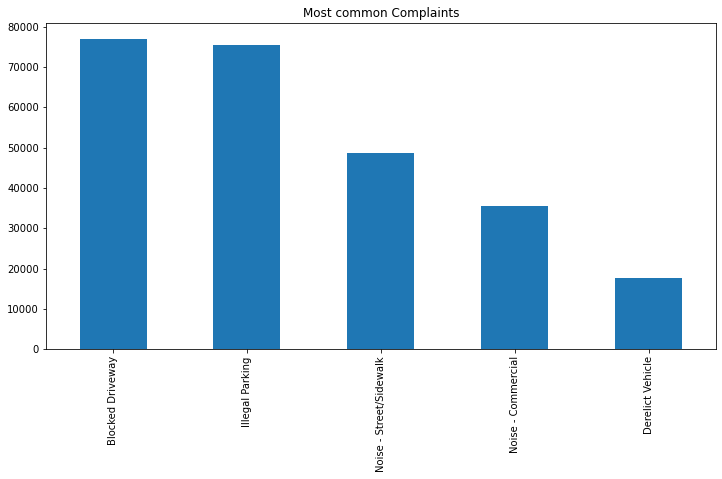

In [15]:
(dataset['Complaint Type'].value_counts()).head().plot(kind='bar',
                    figsize=(12,6), title = 'Most common Complaints')

<b>2. Least frequent Complaints

<AxesSubplot:title={'center':'Least frequent Complaints'}>

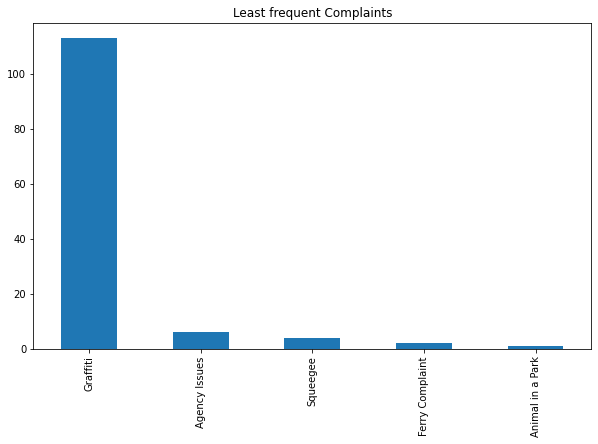

In [16]:
(dataset['Complaint Type'].value_counts()).tail().plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

<b>3. service requests status

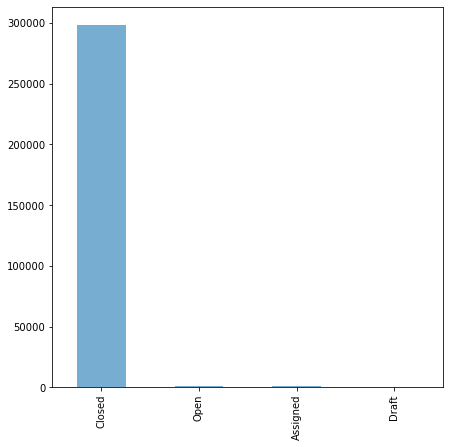

In [17]:
dataset['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

We can observe that majority of the service requests status is closed and a small fraction of requests are "Open", "Assigned" or under "Draft"

<b>4. Top Complaints

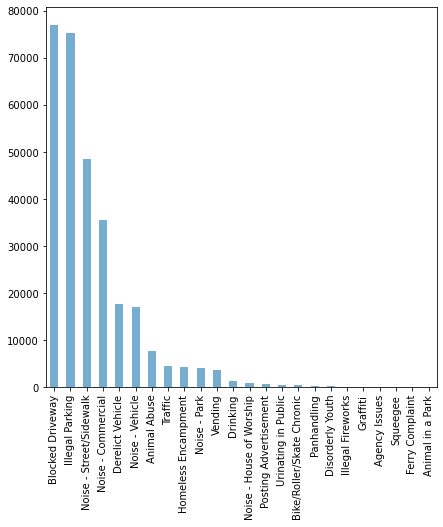

In [18]:
dataset['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

<AxesSubplot:title={'center':'Top 5 Complaints'}>

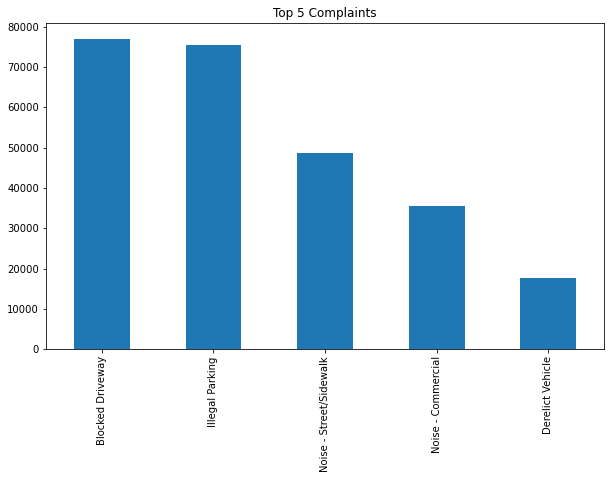

In [20]:
(dataset['Complaint Type'].value_counts()).head(5).plot(kind='bar',
                    figsize=(10,6), title = 'Top 5 Complaints')

the top 5 complaint's are  "Blocked Driveway" or "Illegal Parking" or "Noise - Street/Sidewalk" Noise commercial and Derelict Vehicle

<b>5. Request Date vs Frequency

In [23]:
daily_dates = pd.DataFrame(dataset['Created Date'].dt.date).reset_index()

In [24]:
daily_dates = daily_dates.groupby(['Created Date']).count().reset_index()

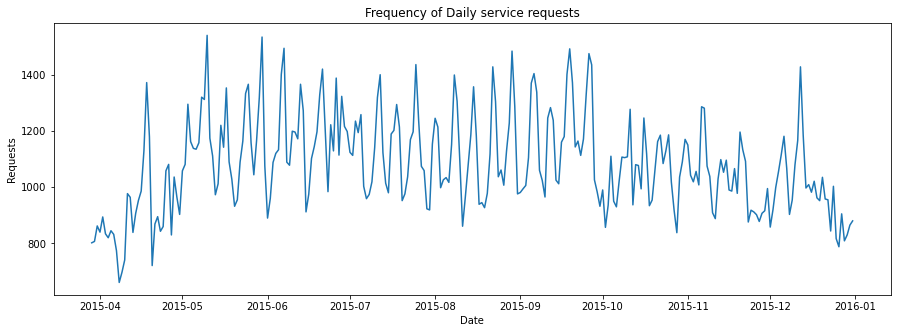

In [35]:
plt.plot(daily_dates['Created Date'], daily_dates['index'])
plt.rcParams['figure.figsize'] = [15,15]
plt.title('Frequency of Daily service requests')
plt.xlabel('Date')
plt.ylabel('Requests')
plt.show()

# 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [36]:
grouped = dataset.groupby(['Location Type','Complaint Type']).mean()
grouped

Unique Key  Incident Zip  \
Location Type       Complaint Type                                    
Bridge              Homeless Encampment  3.166390e+07  11215.000000   
Club/Bar/Restaurant Drinking             3.130468e+07  10751.180822   
                    Noise - Commercial   3.130242e+07  10667.501069   
                    Urinating in Public  3.140580e+07  10986.523810   
Commercial          Animal Abuse         3.147136e+07  10466.580645   
...                                               ...           ...   
Street/Sidewalk     Vending              3.122120e+07  10378.841571   
Subway Station      Animal Abuse         3.122958e+07  10425.636364   
                    Urinating in Public  3.144697e+07  10744.666667   
Terminal            Ferry Complaint      3.122788e+07           NaN   
Vacant Lot          Derelict Vehicle     3.144758e+07  11024.051948   

                                         X Coordinate (State Plane)  \
Location Type       Complaint Type                                    
Bridge              Homeless Encampment                9.950490e+05   
Club/Bar/Restaurant Drinking                           1.005164e+06   
                    Noise - Commercial                 9.993782e+05   
                    Urinating in Public                1.019296e+06   
Commercial          Animal Abuse                       1.001685e+06   
...                                                             ...   
Street/Sidewalk     Vending                            9.959977e+05   
Subway Station      Animal Abuse                       9.972389e+05   
                    Urinating in Public                1.002333e+06   
Terminal            Ferry Complaint                             NaN   
Vacant Lot          Derelict Vehicle                   1.008465e+06   

                                         Y Coordinate (State Plane)  \
Location Type       Complaint Type                                    
Bridge              Homeless Encampment               209136.500000   
Club/Bar/Restaurant Drinking                          205933.213699   
                    Noise - Commercial                206549.608541   
                    Urinating in Public               207099.523810   
Commercial          Animal Abuse                      214065.177419   
...                                                             ...   
Street/Sidewalk     Vending                           212278.982225   
Subway Station      Animal Abuse                      210457.863636   
                    Urinating in Public               209423.166667   
Terminal            Ferry Complaint                             NaN   
Vacant Lot          Derelict Vehicle                  195801.129870   

                                         School or Citywide Complaint  \
Location Type       Complaint Type                                      
Bridge              Homeless Encampment                           NaN   
Club/Bar/Restaurant Drinking                                      NaN   
                    Noise - Commercial                            NaN   
                    Urinating in Public                           NaN   
Commercial          Animal Abuse                                  NaN   
...                                                               ...   
Street/Sidewalk     Vending                                       NaN   
Subway Station      Animal Abuse                                  NaN   
                    Urinating in Public                           NaN   
Terminal            Ferry Complaint                               NaN   
Vacant Lot          Derelict Vehicle                              NaN   

                                         Vehicle Type  Taxi Company Borough  \
Location Type       Complaint Type                                            
Bridge              Homeless Encampment           NaN                   NaN   
Club/Bar/Restaurant Drinking                      NaN                   NaN   
     

In [38]:
grouped_top_5 = dataset.groupby(['Complaint Type','Borough'])[['Request_Closing_Time']].mean().unstack()

In [39]:
grouped_top_5

Request_Closing_Time                            \
Borough                                       BRONX                  BROOKLYN   
Complaint Type                                                                  
Agency Issues                                   NaT                       NaT   
Animal Abuse              0 days 07:20:07.780212014 0 days 04:49:57.021720969   
Animal in a Park                                NaT                       NaT   
Bike/Roller/Skate Chronic    0 days 03:27:32.300000 0 days 05:00:16.936936936   
Blocked Driveway          0 days 06:15:42.350399874 0 days 04:24:38.821295342   
Derelict Vehicle          0 days 09:13:39.266905737 0 days 05:56:50.963120293   
Disorderly Youth          0 days 04:14:18.269841269 0 days 04:09:01.861111111   
Drinking                  0 days 05:47:36.893617021 0 days 03:32:26.019455252   
Ferry Complaint                                 NaT                       NaT   
Graffiti                  0 days 08:53:56.555555555 0 days 08:14:35.534883720   
Homeless Encampment       0 days 07:27:11.211382113 0 days 04:41:41.351225204   
Illegal Fireworks            0 days 05:36:29.500000 0 days 02:20:22.508196721   
Illegal Parking           0 days 06:34:51.034482758 0 days 04:16:20.068387895   
Noise - Commercial        0 days 04:41:50.463214138 0 days 02:59:09.930528888   
Noise - House of Worship  0 days 04:33:34.367088607 0 days 03:04:11.497058823   
Noise - Park              0 days 04:41:54.691042047 0 days 03:09:01.912540192   
Noise - Street/Sidewalk   0 days 05:13:35.976825289 0 days 03:17:44.999625552   
Noise - Vehicle           0 days 05:33:38.854534746 0 days 03:17:00.395479134   
Panhandling               0 days 14:12:49.421052631 0 days 04:18:59.326530612   
Posting Advertisement     0 days 03:27:43.176470588 0 days 03:21:39.422222222   
Squeegee                                        NaT                       NaT   
Traffic                   0 days 04:55:42.565826330 0 days 03:06:13.684162062   
Urinating in Public       0 days 05:23:24.372549019 0 days 03:53:57.529411764   
Vending                   0 days 06:49:32.509234828 0 days 04:31:41.176699029   

                                                                               \
Borough                                   MANHATTAN                    QUEENS   
Complaint Type                                                                  
Agency Issues                                   NaT                       NaT   
Animal Abuse              0 days 03:41:06.544918032 0 days 05:24:49.996268656   
Animal in a Park                                NaT                       NaT   
Bike/Roller/Skate Chronic 0 days 02:53:32.008888888           0 days 04:46:02   
Blocked Driveway          0 days 03:33:26.773539352 0 days 04:32:15.391289231   
Derelict Vehicle          0 days 04:15:57.627560521 0 days 08:29:34.267760236   
Disorderly Youth          0 days 02:24:28.260869565 0 days 03:19:31.864406779   
Drinking                  0 days 03:03:27.918644067 0 days 03:53:52.574229691   
Ferry Complaint                                 NaT                       NaT   
Graffiti                  0 days 05:03:50.272727272 0 days 06:34:04.243243243   
Homeless Encampment       0 days 03:42:07.955363570 0 days 05:59:53.271551724   
Illegal Fireworks         0 days 01:43:12.888888888 0 days 02:21:31.432432432   
Illegal Parking           0 days 03:23:25.025970813 0 days 04:45:03.023067473   
Noise - Commercial        0 days 02:44:03.572557372 0 days 03:46:26.122015478   
Noise - House of Worship  0 days 02:18:18.489690721 0 days 03:35:17.421404682   
Noise - Park              0 days 02:56:41.607438016 0 days 03:49:08.095911949   
Noise - Street/Sidewalk   0 days 02:44:08.425741128 0 days 03:37:29.652598139   
Noise - Vehicle           0 days 02:37:18.929613420 0 days 03:42:22.830592734   
Panhandling               0 days 03:28:27.958549222    0 days 03:55:21.062500   
Posting Advertisement     0 days 02:57:19.341463414    0 days

# 5. Perform a statistical test for the following

# Hypothesis Testing

<b> a.1. Whether the average response time across complaint types is similar or not (overall)

Converting Request_Closing_Time to minutes for more precise results

In [42]:
dataset['Request_Closing_Minutes'] = dataset['Request_Closing_Time'].astype('timedelta64[m]')+1

In [43]:
dataset['Request_Closing_Minutes'].head()

0     56.0
1     87.0
2    292.0
3    466.0
4    208.0
Name: Request_Closing_Minutes, dtype: float64

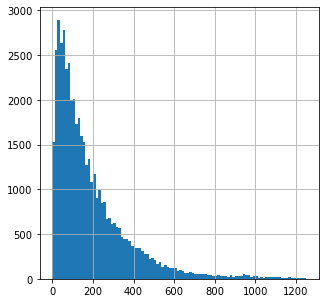

In [45]:
dataset = dataset[dataset['Complaint Type'].notnull()]
original = dataset[dataset['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
plt.rcParams['figure.figsize'] = [5,5]
original.hist(bins=100,range=(0,1250))
plt.show()

distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.

In [46]:
original.describe()


count    48076.000000
mean       207.415509
std        326.850832
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

In [47]:
data = {}
for complaint in dataset['Complaint Type'].unique():
  data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Minutes'])

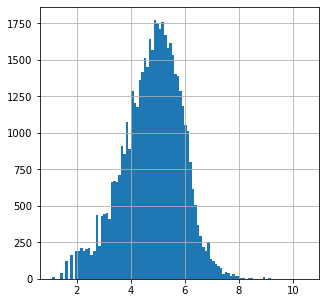

In [48]:
data['Noise - Street/Sidewalk'].hist(bins=100)
plt.show()

In [49]:
for complaint in data.keys():
    print(complaint, ':\t', data[complaint].std())

Noise - Street/Sidewalk :	 1.0888107660642072
Blocked Driveway :	 0.9689925833875508
Illegal Parking :	 1.0676265933053861
Derelict Vehicle :	 1.2473713130448374
Noise - Commercial :	 1.0751948896175545
Noise - House of Worship :	 1.1578783566404034
Posting Advertisement :	 1.1940496830014724
Noise - Vehicle :	 1.0640895098463043
Animal Abuse :	 1.035321242912534
Vending :	 1.0987535439761758
Traffic :	 1.1690311702610745
Drinking :	 1.0354238334658077
Bike/Roller/Skate Chronic :	 1.1547492289003027
Panhandling :	 1.0578811759503506
Noise - Park :	 1.1038829059331874
Homeless Encampment :	 1.0212999697423413
Urinating in Public :	 1.0896898895618483
Graffiti :	 1.0581967861803852
Disorderly Youth :	 1.0276748370244453
Illegal Fireworks :	 1.1905406895067956
Ferry Complaint :	 nan
Agency Issues :	 0.8285353314860184
Squeegee :	 0.8469384425802964
Animal in a Park :	 nan


<b>ANOVA Test (Analysis of Variance)
as we have to compare the means of more than two groups.

<b>Conditions for test:

All distributions must follow a normal distributions curve. We have verified this after the log transformation.
Standard deviation for all groups must be same. Above output proves that this is true.
All samples are drawn independently of each other.

<b>Null Hypothesis: Average response time for all the complaints type is similar.

Alternate Hypothesis: Average response time for all the complaints type is not similar.

<b>if p < alpha(0.05):  Reject Null Hypothesis, Average response time for all the complaints type is not similar.

<b>if p > alpha(0.05): Fail to reject Null Hypothesis, Average response time for all the complaints type is similar.

In [51]:
from scipy.stats import f_oneway

In [52]:
stat, p = f_oneway(data['Blocked Driveway'],
                   data['Illegal Parking'],
                   data['Noise - Street/Sidewalk'],
                   data['Noise - Commercial'])

print('Statistics=%.3f, p=%.3f\n' % (stat, p))

print("Result: ", end=' ')
if p < 0.05:
     print('Different distributions (reject Null Hypothesis H0)')
else:
    print('Same distributions (fail to reject Null Hypothesis H0)')

Statistics=nan, p=nan

Result:  Same distributions (fail to reject Null Hypothesis H0)


<b>b. Are the type of complaint or service requested and location related?

To find the correlation between location and complaint types, we will consider below columns

1.Complaint Type

2.Borough

3.Longitude

4.Latitude

5.City

In [54]:
dataset['City'].isnull().sum()

2614

In [55]:
dataset = dataset[dataset['City'].notnull()]

In [56]:
dataset['City'].isnull().sum()

0

In [57]:
sample = dataset[['Complaint Type','Borough','Longitude','Latitude','City']]

In [58]:
sample

,Complaint Type,Borough,Longitude,Latitude,City
0,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682,NEW YORK
1,Blocked Driveway,QUEENS,-73.915094,40.775945,ASTORIA
2,Blocked Driveway,BRONX,-73.888525,40.870325,BRONX
3,Illegal Parking,BRONX,-73.828379,40.835994,BRONX
4,Illegal Parking,QUEENS,-73.874170,40.733060,ELMHURST
...,...,...,...,...,...
300692,Noise - Commercial,MANHATTAN,-73.991378,40.716053,NEW YORK
300694,Blocked Driveway,QUEENS,-73.846087,40.694077,RICHMOND HILL
300695,Noise - Commercial,BROOKLYN,-73.944234,40.699590,BROOKLYN
300696,Noise - Commercial,BRONX,-73.834587,40.837708,BRONX


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
sample['City'] = le.fit_transform(sample['City'])
sample['Complaint Type'] = le.fit_transform(sample['Complaint Type'])
sample['Borough'] = le.fit_transform(sample['Borough'])

C:\Users\indir\AppData\Local\Temp\ipykernel_8788\1844336843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['City'] = le.fit_transform(sample['City'])
C:\Users\indir\AppData\Local\Temp\ipykernel_8788\1844336843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Complaint Type'] = le.fit_transform(sample['Complaint Type'])
C:\Users\indir\AppData\Local\Temp\ipykernel_8788\1844336843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [61]:
sample

,Complaint Type,Borough,Longitude,Latitude,City
0,14,2,-73.923501,40.865682,33
1,3,3,-73.915094,40.775945,1
2,3,0,-73.888525,40.870325,6
3,10,0,-73.828379,40.835994,6
4,10,3,-73.874170,40.733060,13
...,...,...,...,...,...
300692,11,2,-73.991378,40.716053,33
300694,3,3,-73.846087,40.694077,39
300695,11,1,-73.944234,40.699590,7
300696,11,0,-73.834587,40.837708,6


In [62]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.066180,-0.181033,0.152843,0.095040
Borough,-0.066180,1.000000,0.021316,-0.249499,0.717805
Longitude,-0.181033,0.021316,1.000000,0.364968,-0.124115
Latitude,0.152843,-0.249499,0.364968,1.000000,-0.000571
City,0.095040,0.717805,-0.124115,-0.000571,1.000000


no realtion found between Location and complaint type